<a href="https://colab.research.google.com/github/fzambran/EstadisticasCienciaDeDatos/blob/main/Tareas/est_ds_python_3_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejercicios de práctica

En los siguientes ejercicios estudiaremos distintas hipótesis, para ello usaremos una muestra de la *Encuesta Nacional de Salud* disponible en el archivo `ENS_reducida.xlsx`. En todos los ejercicios debe chequear si es correcto atribuir una distribución normal a los datos. Además, use un nivel de confianza al 95% o un nivel de significancia $\alpha=0.05$ cuando sea necesario y concluya de acuerdo al contexto del estudio.

1. Cargue la base de datos, realice un análisis inicial de datos que incluya un gráfico de relaciones de a pares y otro con la correlación lineal entre cada par de variables cuantitativas. Indique las tres asociaciones más fuertes y las tres asociaciones más débiles.

In [ ]:
# Responda aquí:
# ES NORMAL QUE DEMORE UN POCO
import pandas as pd

data = pd.read_excel("ENS_reducida.xlsx")
display(data.head())

,COLESTEROL,HDL,EDAD,FUMA,NEDU,SEXO,PAS,PAD,TALLA,CINTURA,CUELLO,IMC,PESO,DEPORTE,DIABETES
0,161.6146,43.2533,21,No,> 12 ños,Femenino,109.3657,69.7861,159.2240,68.2223,30.5067,21.1469,53.6123,No,No
1,221.9609,45.9553,59,No,8 - 12 años,Masculino,149.1800,89.8402,171.2648,88.1016,40.7788,30.2438,88.7100,No,No
2,254.8755,87.2984,51,No,8 - 12 años,Femenino,139.1653,82.8118,163.5937,110.4856,38.4818,21.5239,57.6042,No,Si
3,187.3437,57.3342,50,No,> 12 ños,Masculino,174.1770,113.4944,166.8728,97.9801,37.8982,30.6329,85.3021,No,No
4,252.3962,31.7201,60,Si,< 8 años,Masculino,150.7024,78.7364,147.6984,81.1719,35.8163,31.3944,68.4862,No,Si


In [ ]:
print(data.shape)

(350, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COLESTEROL  350 non-null    float64
 1   HDL         350 non-null    float64
 2   EDAD        350 non-null    int64  
 3   FUMA        350 non-null    object 
 4   NEDU        350 non-null    object 
 5   SEXO        350 non-null    object 
 6   PAS         350 non-null    float64
 7   PAD         350 non-null    float64
 8   TALLA       350 non-null    float64
 9   CINTURA     350 non-null    float64
 10  CUELLO      350 non-null    float64
 11  IMC         350 non-null    float64
 12  PESO        350 non-null    float64
 13  DEPORTE     350 non-null    object 
 14  DIABETES    350 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 41.1+ KB


In [ ]:
display(data.describe())

,COLESTEROL,HDL,EDAD,PAS,PAD,TALLA,CINTURA,CUELLO,IMC,PESO
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,192.767930,47.995755,44.651429,128.189599,76.884457,161.480519,92.750534,37.411316,27.929403,72.033715
std,43.277475,12.946062,18.050508,21.360274,11.246715,9.305694,13.682320,4.873636,6.617738,14.564562
min,93.669800,21.481200,15.000000,91.212300,51.006600,139.882700,63.107400,25.180200,11.709100,37.349600
25%,162.065025,38.779125,30.000000,112.808250,69.368125,154.400700,83.796075,34.669900,23.115875,62.292200
50%,189.780350,46.941300,44.000000,123.942100,75.419550,161.081550,91.777100,37.161100,27.391850,70.400550
75%,221.840475,54.453600,58.000000,138.999000,84.593750,167.931125,100.320250,39.718950,31.826675,80.529025
max,311.683600,97.158300,93.000000,221.787300,116.517000,190.895700,133.161600,92.892200,51.384200,130.797900


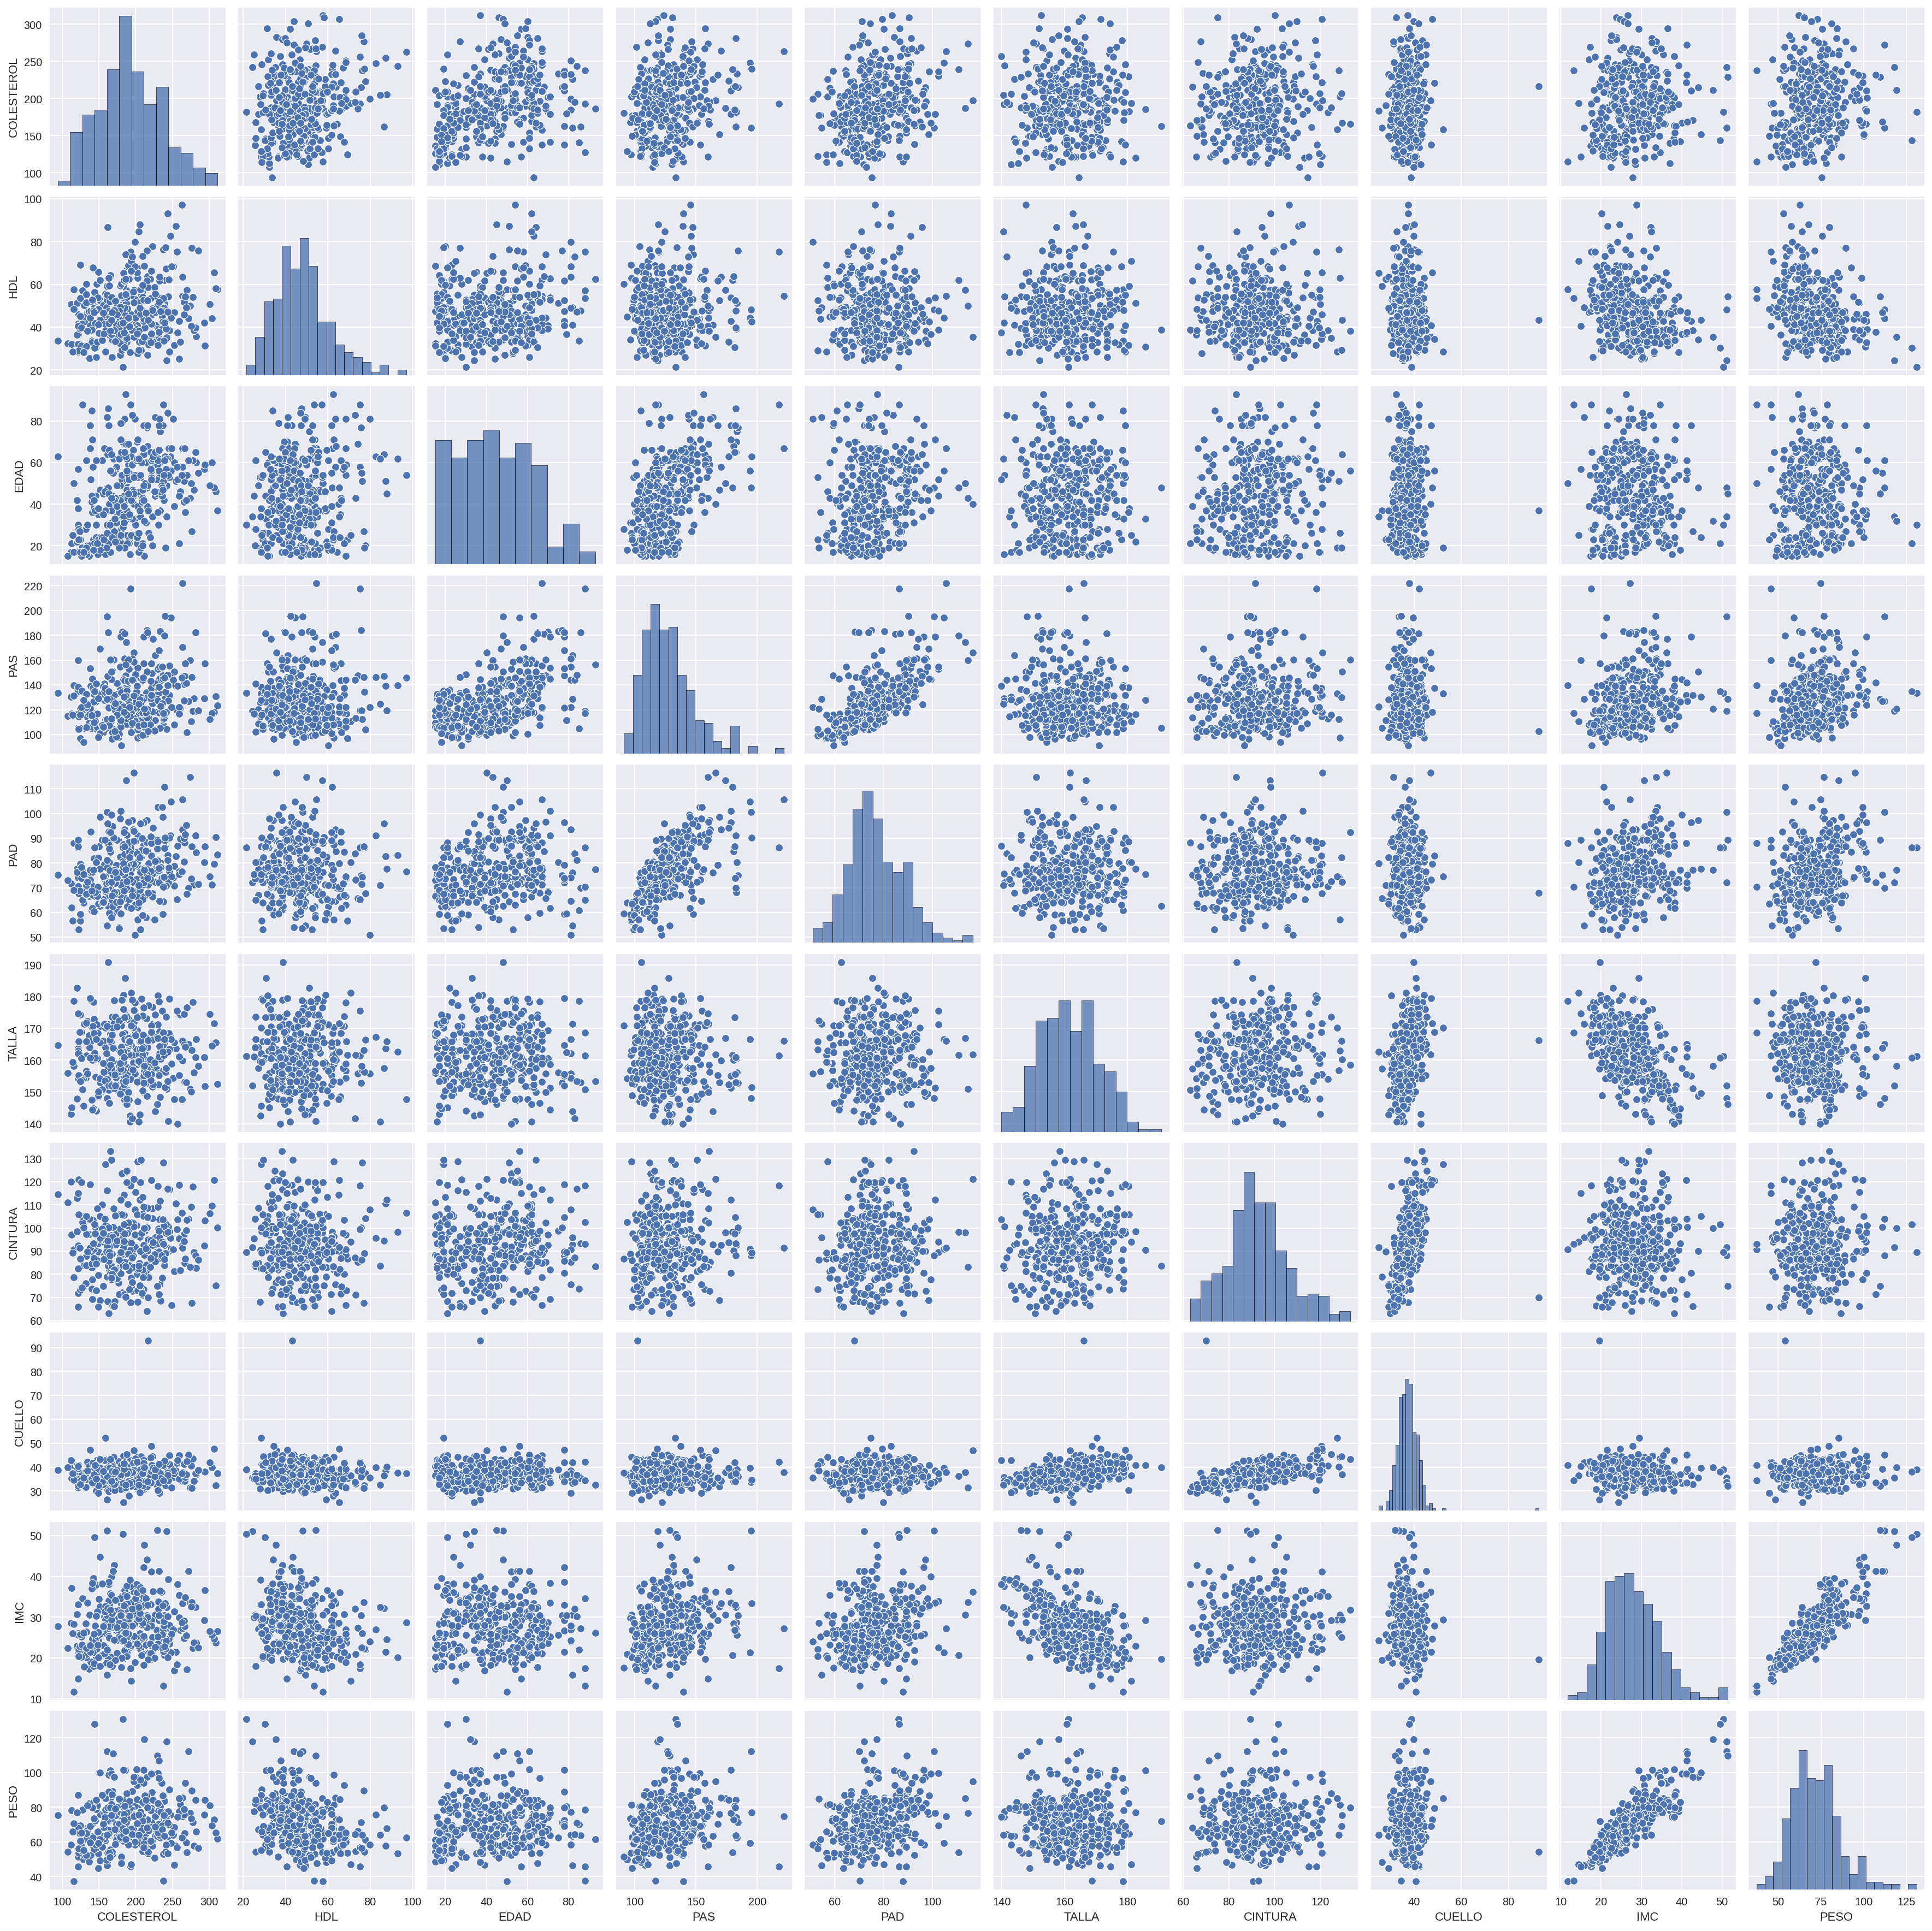

In [ ]:
import seaborn as sns

sns.pairplot(data);

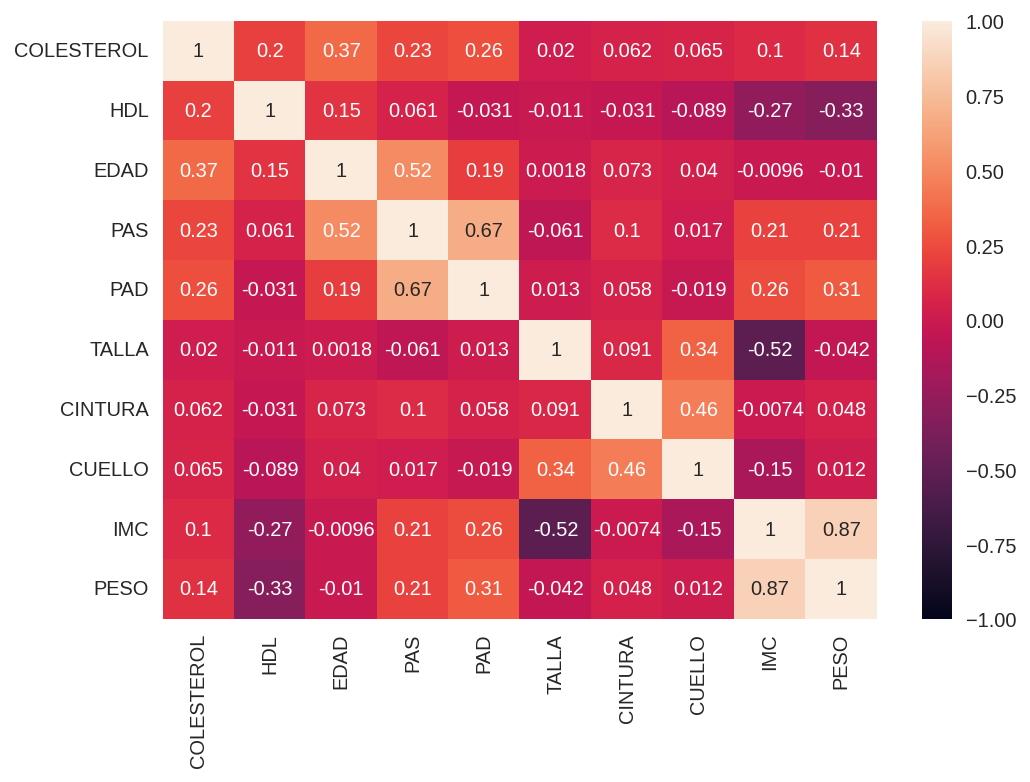

In [ ]:
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1);

In [ ]:
# fuertes: más cercanas a -1 o 1
# * IMC - PESO
# * TALLA - IMC
# * PAS - EDAD

# débiles: más cercanas a 0
# * EDAD - TALLA
# * CINTURA - IMC
# * EDAD - IMC

2. Estudie si la media de HDL a nivel poblacional es distinta a 50. ¿Que relación existe entre el valor-p y el intervalo de confianza?

10.0


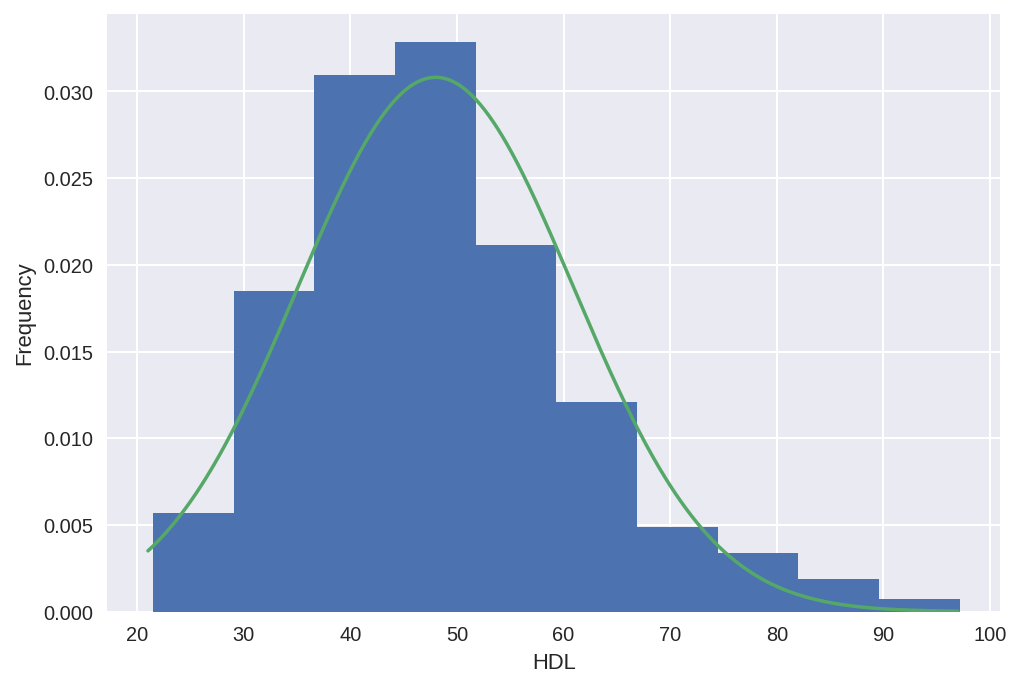

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

media = data["HDL"].mean()
desv_est = data["HDL"].std()

x = [valor / 10 for valor in range(210, 971)]
y = norm(loc=media, scale=desv_est).pdf(x)
bins = np.ceil(1 + np.log2(data.shape[0]))
print(bins)

fig, ax = plt.subplots()
data["HDL"].plot(kind="hist", bins=10, density=True, ax=ax)
ax.plot(x, y)
plt.xlabel("HDL");

In [ ]:
# !pip install pingouin
import pingouin as pg
pg.ttest(data["HDL"], 50)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.896323,349,two-sided,0.004014,"[46.63, 49.36]",0.154815,3.659,0.823396


In [ ]:
# Existe discordancia entre muestra y H_0, se rechaza H_0.
# El intervalo de confianza no incluye a 50, lo que conlleva
# a una conclusión similar a la obtenida mediante valor-p

3. Estudie si la media poblacional de edad es menor a 45 años.

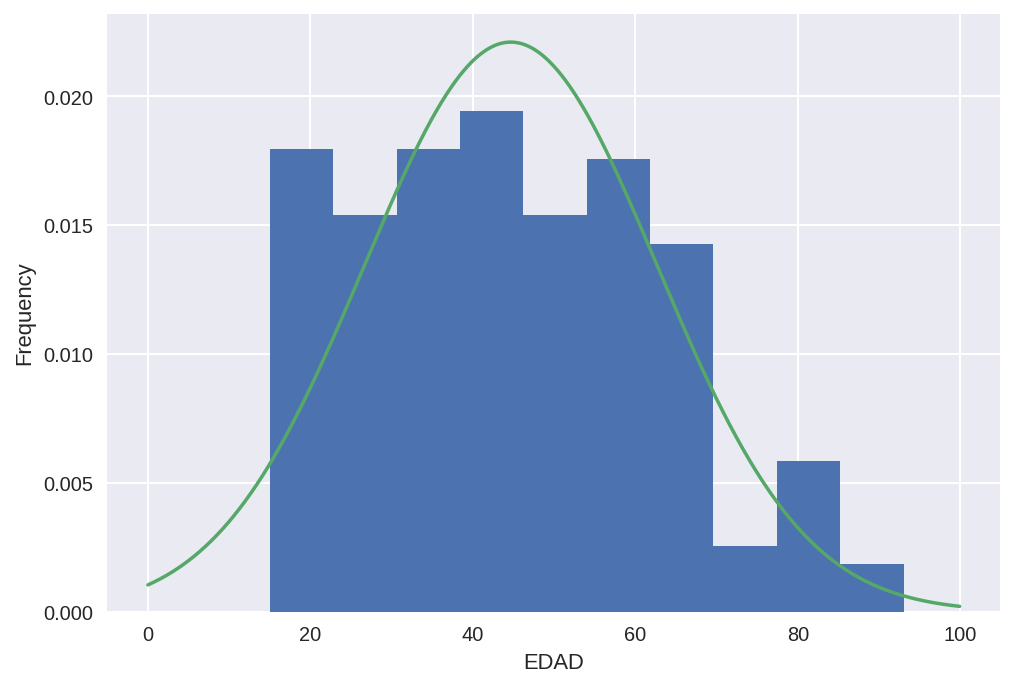

In [ ]:
media = data["EDAD"].mean()
desv_est = data["EDAD"].std()

x = [valor / 10 for valor in range(0, 1000)]
y = norm(loc=media, scale=desv_est).pdf(x)

fig, ax = plt.subplots()
data["EDAD"].plot(kind="hist", bins=10, density=True, ax=ax)
ax.plot(x, y)
plt.xlabel("EDAD");

In [ ]:
# OJO: pareciera que no es apropiado asumir distribución normal
# Las conclusiones pueden estar erroneas, pero se continuará
# a modo de ejercitar las herramientas vistas en la clase

In [ ]:
display(pg.ttest(data["EDAD"], 45, alternative="less"))

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.361274,349,less,0.359057,"[-inf, 46.24]",0.019311,0.128,0.099522


In [ ]:
# Existe concordancia entre H_0 y muestra, no se rechaza H_0.

4. Finalmente, estudie si el IMC promedio es distinto a nivel poblacional entre el sexo femenino y masculino.

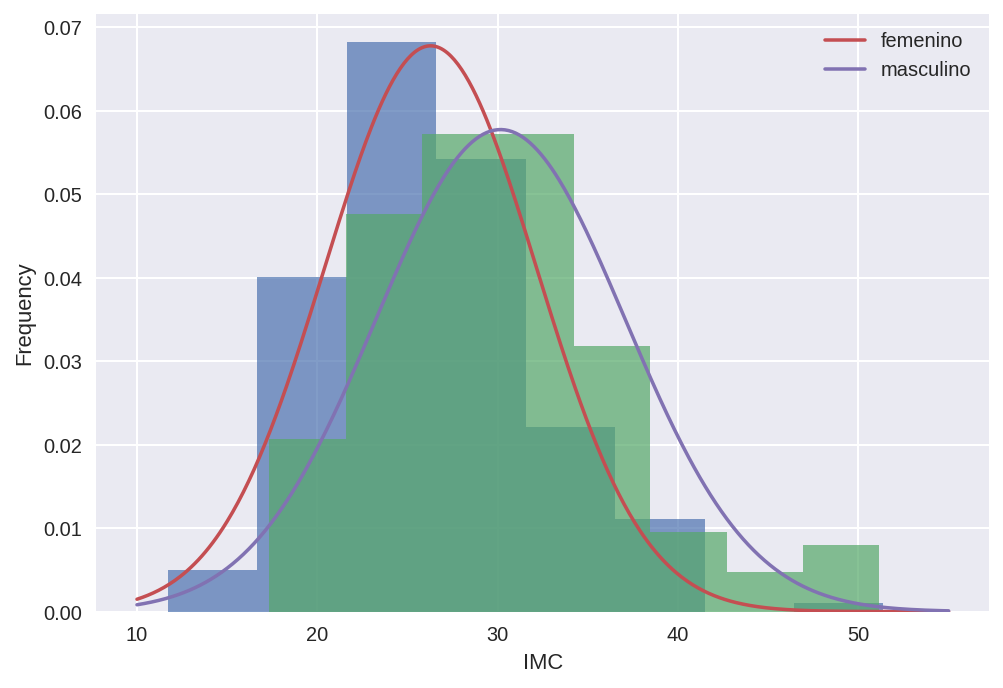

In [ ]:
IMC_f = data.query("SEXO == 'Femenino'")["IMC"]
IMC_m = data.query("SEXO == 'Masculino'")["IMC"]

media_f = IMC_f.mean()
media_m = IMC_m.mean()
desv_f = IMC_f.std()
desv_m = IMC_m.std()

x = [valor / 10 for valor in range(100, 551)]
y_f = norm(loc=media_f, scale=desv_f).pdf(x)
y_m = norm(loc=media_m, scale=desv_m).pdf(x)

fig, ax = plt.subplots()
IMC_f.plot(kind="hist", bins=8, alpha=0.7, density=True, ax=ax)
IMC_m.plot(kind="hist", bins=8, alpha=0.7, density=True, ax=ax)
ax.plot(x, y_f)
ax.plot(x, y_m)
plt.xlabel("IMC")
plt.legend(["femenino", "masculino"]);

In [ ]:
display(pg.ttest(IMC_f, IMC_m))

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.528024,288.345709,two-sided,7.253386e-08,"[-5.26, -2.5]",0.611918,1.716e+05,0.999886


In [ ]:
# Existe discordancia entre muestras y H_0, se rechaza H_0